<a href="https://colab.research.google.com/github/7hsnz/Machine-Learning-Project/blob/main/ML_(VOTING).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('/content/C__depression analysis_Machine Learning_inal project_cleaned_dataset with new features.csv')

In [11]:
df

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,target,cat_1_encoded,region_A,region_B,region_C,feature_9
0,0,0.496714,1.146509,-0.648521,0.833005,0.784920,-2.209437,-1.300105,-2.242241,1,0,False,False,True,0.413765
1,1,-0.138264,-0.061846,0.005196,0.403768,0.704674,-2.498565,-1.339227,-1.942298,0,1,True,False,False,-0.055827
2,2,0.647689,1.395115,-0.764126,1.708266,-0.250029,1.956259,1.190238,1.503559,1,2,False,False,True,1.106424
3,3,1.523030,2.657560,-2.461653,2.649051,0.882201,3.445638,2.120913,3.409035,1,2,False,True,False,4.034584
4,4,-0.234153,-0.499391,0.576097,-0.441656,0.610601,0.211425,0.935759,-0.401463,0,1,False,False,True,0.103415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,8995,0.101630,0.400250,0.005196,-0.019412,-0.063150,0.077627,0.540975,-0.169030,0,0,True,False,False,-0.001973
8996,8996,1.167218,2.177774,-1.716067,1.994835,0.350043,-0.544915,0.089050,-0.944220,1,2,False,False,True,2.328407
8997,8997,1.588447,3.333945,-2.615488,3.476880,-0.933276,2.027658,0.239583,1.951491,1,2,False,False,True,5.522841
8998,8998,-0.684987,-1.599835,1.063341,-1.252109,-0.724001,2.228943,0.989794,1.936476,0,3,False,True,False,0.857679


In [12]:
# Voting Classifier
clf_1 = LogisticRegression(random_state=1)
clf_2 = DecisionTreeClassifier(random_state=1)
clf_3 = SVC(probability = True, random_state=1)

# train the classifiers
clf_1.fit(X_train, y_train)
clf_2.fit(X_train, y_train)
clf_3.fit(X_train, y_train)

# create and train
v_clf = VotingClassifier(estimators=[('lr', clf_1), ('dt', clf_2), ('svc', clf_3)], voting='soft')
v_clf = v_clf.fit(X_train, y_train)

y_train_pred_soft = v_clf.predict(X_train)
accuracy_train_soft = accuracy_score(y_train, y_train_pred_soft)
print(f'Accuracy on training set: {accuracy_train_soft}')

y_pred_soft = v_clf.predict(X_test)
accuracy_test_soft = accuracy_score(y_test, y_pred_soft)
print(f'Accuracy on test set: {accuracy_test_soft}')

# confusion matrix
cm_default = confusion_matrix(y_test, y_pred_soft)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_default, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y)) # xticklabels and yticklabels added
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ROC curve and AUC
y_probs = v_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (class 1)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') #Dashed line represents random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(f"Voting Classifier AUC: {roc_auc}")

# cross validation
#kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Or StratifiedKFold for classification
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #Use this for imbalanced dataset

cv_scores = cross_val_score(v_clf, X_train, y_train, cv=kfold, scoring='accuracy')  # Use X_train!

print("\nCross-validation scores (using cross_val_score):", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())
print("Standard deviation of scores:", cv_scores.std())

plt.figure(figsize=(8, 6))
sns.boxplot(y=cv_scores)  # Create a box plot
plt.title("Cross-Validation Scores")
plt.ylabel("Accuracy")  # Or your chosen metric
plt.show()

NameError: name 'LogisticRegression' is not defined

Best Parameters: {'dt__max_depth': 5, 'lr__C': 1, 'svc__C': 10, 'voting': 'soft', 'weights': (1, 2, 1)}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89       947
         1.0       0.90      0.83      0.86       853

    accuracy                           0.88      1800
   macro avg       0.88      0.87      0.87      1800
weighted avg       0.88      0.88      0.88      1800



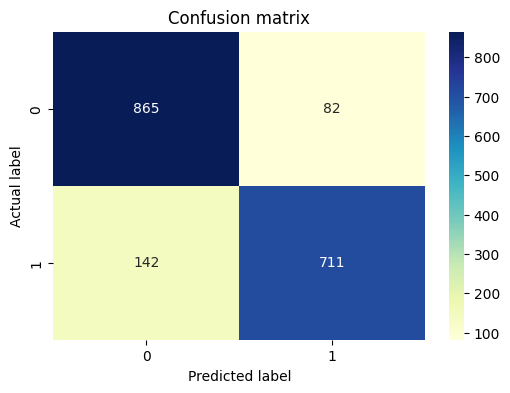

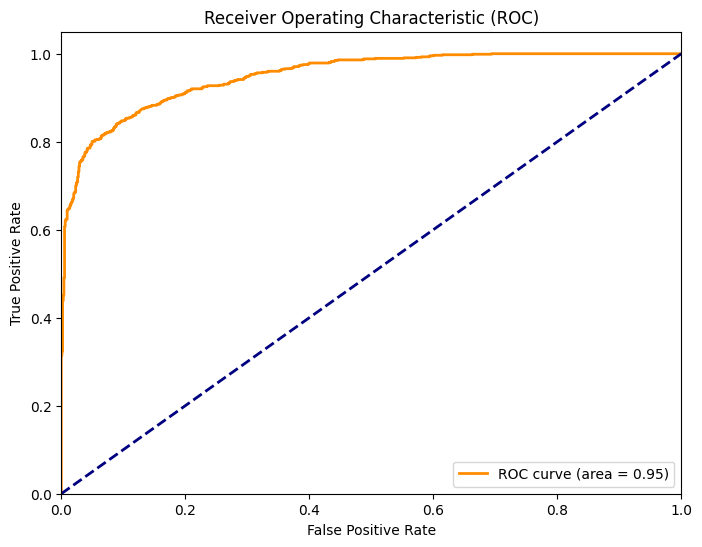

Random Forest AUC: 0.9499499251662868

Cross-validation scores (using cross_val_score): [0.875      0.86458333 0.88055556 0.89166667 0.88263889]
Mean cross-validation score: 0.8788888888888889
Standard deviation of scores: 0.008942977795558473


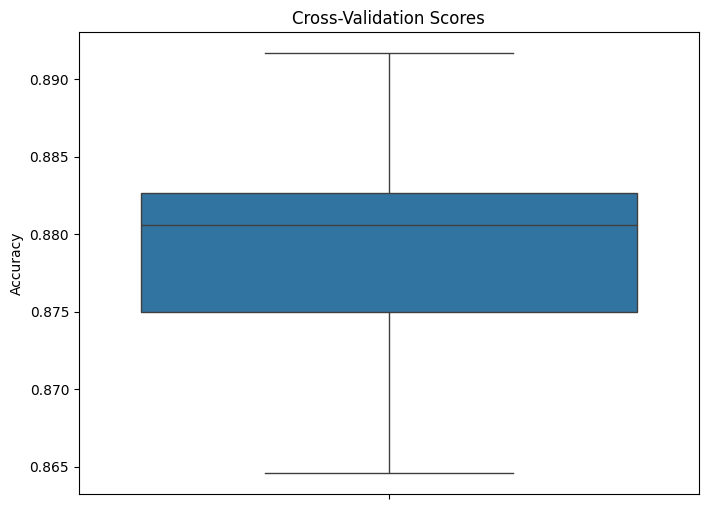

Training Accuracy: 0.8878
Testing Accuracy: 0.8756


In [ ]:
# voting classifier with tuning
param_grid = {
    'lr__C': [0.1, 1, 10],  # Tune C for Logistic Regression
    'dt__max_depth': [None, 5, 10],  # Tune max_depth for Decision Tree
    'svc__C': [0.1, 1, 10],  # Tune C for SVC
    'voting': ['soft'],  # Tune voting strategy
    'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2)]  # Tune weights
}
clf_1 = LogisticRegression(random_state=1)
clf_2 = DecisionTreeClassifier(random_state=1)
clf_3 = SVC(probability=True, random_state=1)

vc = VotingClassifier(estimators=[('lr', clf_1), ('dt', clf_2), ('svc', clf_3)], voting='soft')

best_vc = evaluate_model(vc, param_grid, X_train, y_train, X_test, y_test)
check_overfitting(best_vc, X_train, y_train, X_test, y_test)
#feature_importance(best_vc, selected_features)